In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Housing Dataset.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
datatype=np.array(df.dtypes)
datatype

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O'

In [6]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Ut

To check missing values

<AxesSubplot:>

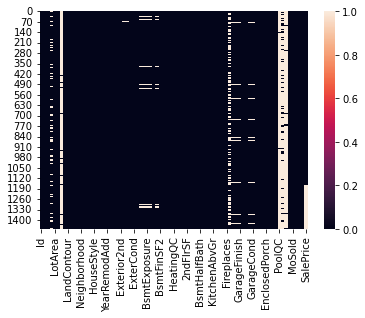

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

In [9]:
null=np.array(df.isnull().sum())
null

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,  292], dtype=int64)

In [4]:
df1=df.drop(['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000.0
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000.0
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790.0
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000.0
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,78.0,10206,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2008,WD,Normal,NaN
1456,20,RL,57.0,9245,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,NaN
1457,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,NaN
1458,50,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,10,2006,WD,Normal,NaN


In [5]:
le=LabelEncoder()
df1['MSZoning']=le.fit_transform(df1['MSZoning'])
df1['Street']=le.fit_transform(df1['Street'])
df1['LotShape']=le.fit_transform(df1['LotShape'])
df1['LandContour']=le.fit_transform(df1['LandContour'])
df1['Utilities']=le.fit_transform(df1['Utilities'])
df1['LotConfig']=le.fit_transform(df1['LotConfig'])
df1['LandSlope']=le.fit_transform(df1['LandSlope'])
df1['Neighborhood']=le.fit_transform(df1['Neighborhood'])

df1['Condition1']=le.fit_transform(df1['Condition1'])
df1['Condition2']=le.fit_transform(df1['Condition2'])

df1['BldgType']=le.fit_transform(df1['BldgType'])
df1['HouseStyle']=le.fit_transform(df1['HouseStyle'])
df1['RoofStyle']=le.fit_transform(df1['RoofStyle'])
df1['RoofMatl']=le.fit_transform(df1['RoofMatl'])

df1['Exterior1st']=le.fit_transform(df1['Exterior1st'])
df1['Exterior2nd']=le.fit_transform(df1['Exterior2nd'])
df1['MasVnrType']=le.fit_transform(df1['MasVnrType'])
df1['ExterQual']=le.fit_transform(df1['ExterQual'])
df1['ExterCond']=le.fit_transform(df1['ExterCond'])

df1['Foundation']=le.fit_transform(df1['Foundation'])

df1['BsmtQual']=le.fit_transform(df1['BsmtQual'])
df1['BsmtCond']=le.fit_transform(df1['BsmtCond'])
df1['BsmtExposure']=le.fit_transform(df1['BsmtExposure'])
df1['BsmtFinType1']=le.fit_transform(df1['BsmtFinType1'])
df1['BsmtFinType2']=le.fit_transform(df1['BsmtFinType2'])

df1['Heating']=le.fit_transform(df1['Heating'])
df1['HeatingQC']=le.fit_transform(df1['HeatingQC'])
df1['CentralAir']=le.fit_transform(df1['CentralAir'])
df1['Electrical']=le.fit_transform(df1['Electrical'])
df1['KitchenQual']=le.fit_transform(df1['KitchenQual'])
df1['Functional']=le.fit_transform(df1['Functional'])

                                    
df1['GarageType']=le.fit_transform(df1['GarageType'])
df1['GarageQual']=le.fit_transform(df1['GarageQual'])
df1['GarageCond']=le.fit_transform(df1['GarageCond'])
df1['GarageFinish']=le.fit_transform(df1['GarageFinish'])
df1['PavedDrive']=le.fit_transform(df1['PavedDrive'])


df1['SaleType']=le.fit_transform(df1['SaleType'])
df1['SaleCondition']=le.fit_transform(df1['SaleCondition'])



df1  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,NaN,4928,1,0,3,0,4,0,...,0,0,0,0,0,2,2007,8,4,128000.0
1,20,3,95.0,15865,1,0,3,0,4,1,...,0,0,224,0,0,10,2007,8,4,268000.0
2,60,3,92.0,9920,1,0,3,0,1,0,...,0,0,0,0,0,6,2007,8,4,269790.0
3,20,3,105.0,11751,1,0,3,0,4,0,...,0,0,0,0,0,1,2010,0,4,190000.0
4,20,3,NaN,16635,1,0,3,0,2,0,...,0,0,0,0,0,6,2009,8,4,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,1,3,3,0,4,0,...,0,0,0,0,0,10,2008,8,4,NaN
1456,20,3,57.0,9245,1,1,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,NaN
1457,20,3,NaN,11241,1,0,3,0,1,0,...,0,0,0,0,700,3,2010,8,4,NaN
1458,50,4,50.0,5000,1,3,3,0,0,0,...,36,0,0,0,0,10,2006,8,4,NaN


In [12]:
#df1[['col1', 'col2']] = df1[['col1', 'col2']].fillna(df1[['col1', 'col2']].median())


In [6]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,69.0,4928,1,0,3,0,4,0,...,0,0,0,0,0,2,2007,8,4,128000.0
1,20,3,95.0,15865,1,0,3,0,4,1,...,0,0,224,0,0,10,2007,8,4,268000.0
2,60,3,92.0,9920,1,0,3,0,1,0,...,0,0,0,0,0,6,2007,8,4,269790.0
3,20,3,105.0,11751,1,0,3,0,4,0,...,0,0,0,0,0,1,2010,0,4,190000.0
4,20,3,69.0,16635,1,0,3,0,2,0,...,0,0,0,0,0,6,2009,8,4,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,1,3,3,0,4,0,...,0,0,0,0,0,10,2008,8,4,NaN
1456,20,3,57.0,9245,1,1,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,NaN
1457,20,3,69.0,11241,1,0,3,0,1,0,...,0,0,0,0,700,3,2010,8,4,NaN
1458,50,4,50.0,5000,1,3,3,0,0,0,...,36,0,0,0,0,10,2006,8,4,NaN


In [7]:
df3=df1.dropna(axis=0)
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,69.0,4928,1,0,3,0,4,0,...,0,0,0,0,0,2,2007,8,4,128000.0
1,20,3,95.0,15865,1,0,3,0,4,1,...,0,0,224,0,0,10,2007,8,4,268000.0
2,60,3,92.0,9920,1,0,3,0,1,0,...,0,0,0,0,0,6,2007,8,4,269790.0
3,20,3,105.0,11751,1,0,3,0,4,0,...,0,0,0,0,0,1,2010,0,4,190000.0
4,20,3,69.0,16635,1,0,3,0,2,0,...,0,0,0,0,0,6,2009,8,4,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,69.0,9819,1,0,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,122000.0
1164,20,3,67.0,8777,1,3,3,0,4,0,...,0,0,0,0,0,5,2009,8,4,108000.0
1165,160,3,24.0,2280,1,3,3,0,2,0,...,0,0,0,0,0,7,2009,8,4,148500.0
1166,70,0,50.0,8500,1,3,3,0,4,0,...,172,0,0,0,0,7,2008,8,4,40000.0


# Summary Statistics

In [10]:
df3.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.00000,1097.000000
mean,55.893345,3.013674,71.160438,10646.870556,0.997265,1.907931,2.782133,0.0,2.989061,0.062899,...,22.016408,3.875114,16.025524,3.671832,49.602552,6.377393,2007.803099,7.451231,3.80948,185704.073838
std,40.679387,0.616674,22.437947,9158.244654,0.052247,1.419912,0.696006,0.0,1.650002,0.281193,...,62.457472,30.001063,56.699291,46.319502,560.221250,2.670083,1.328886,1.653254,1.05470,78338.276648
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.00000,35311.000000
25%,20.000000,3.000000,60.000000,7795.000000,1.000000,0.000000,3.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.00000,134900.000000
50%,50.000000,3.000000,69.000000,9600.000000,1.000000,3.000000,3.000000,0.0,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.00000,168000.000000
75%,70.000000,3.000000,80.000000,11700.000000,1.000000,3.000000,3.000000,0.0,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.00000,220000.000000
max,190.000000,4.000000,313.000000,164660.000000,1.000000,3.000000,3.000000,0.0,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.00000,755000.000000


Exploring data variable

In [11]:
df3.LotShape.unique()

array([0, 3, 1, 2])

In [12]:
df3.LandSlope.unique()

array([0, 1, 2])

In [13]:
df3.LandSlope.value_counts()

0    1039
1      47
2      11
Name: LandSlope, dtype: int64

To Check correlation

In [8]:
dfcor=df3.corr()
dfcor

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.006671,-0.329885,-0.116223,-0.031046,0.089726,-0.016483,NaN,0.064103,0.002661,...,-0.012386,-0.043214,-0.008092,0.011903,-0.022044,-0.012893,-0.036829,0.025679,-0.009214,-0.052416
MSZoning,-0.006671,1.000000,-0.054032,-0.016307,0.171074,0.048330,-0.012185,NaN,-0.037514,-0.026011,...,0.143621,0.004679,0.032713,-0.001759,0.003655,-0.018098,-0.002279,0.067328,-0.012825,-0.132696
LotFrontage,-0.329885,-0.054032,1.000000,0.288828,-0.032314,-0.127491,-0.072952,NaN,-0.169138,0.033540,...,0.024518,0.048448,0.024769,0.200385,-0.006284,0.019944,-0.001510,-0.027435,0.050026,0.316342
LotArea,-0.116223,-0.016307,0.288828,1.000000,-0.304012,-0.187019,-0.176585,NaN,-0.149481,0.419529,...,-0.007531,0.023758,0.020544,0.096620,0.051116,0.010754,-0.034826,0.009415,0.031161,0.237779
Street,-0.031046,0.171074,-0.032314,-0.304012,1.000000,-0.003397,0.134146,NaN,0.010237,-0.174595,...,0.018468,0.006767,0.014808,0.004153,-0.036322,-0.018757,-0.034045,0.035425,0.023652,0.042616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.012893,-0.018098,0.019944,0.010754,-0.018757,-0.050510,-0.027888,NaN,0.024340,0.048561,...,-0.028558,0.019588,0.030890,-0.041093,-0.008543,1.000000,-0.140268,-0.055561,0.011299,0.059233
YrSold,-0.036829,-0.002279,-0.001510,-0.034826,-0.034045,0.021331,0.002901,NaN,-0.015547,-0.005894,...,0.000028,0.015082,0.018279,-0.068125,-0.010893,-0.140268,1.000000,0.018051,0.006411,-0.042616
SaleType,0.025679,0.067328,-0.027435,0.009415,0.035425,-0.023097,-0.036599,NaN,-0.009896,0.054690,...,-0.011585,-0.012715,0.013387,0.014899,0.016413,-0.055561,0.018051,1.000000,0.162896,-0.040535
SaleCondition,-0.009214,-0.012825,0.050026,0.031161,0.023652,-0.047670,0.044082,NaN,0.044939,-0.082617,...,-0.104139,-0.003636,-0.007990,-0.083981,0.009541,0.011299,0.006411,0.162896,1.000000,0.200478


<AxesSubplot:>

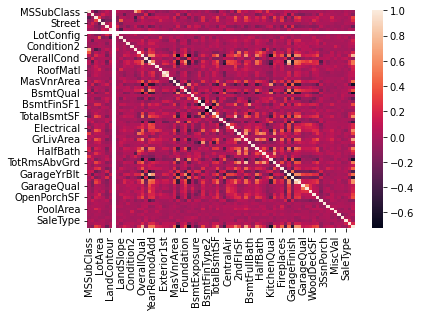

In [15]:
sns.heatmap(dfcor)

<AxesSubplot:>

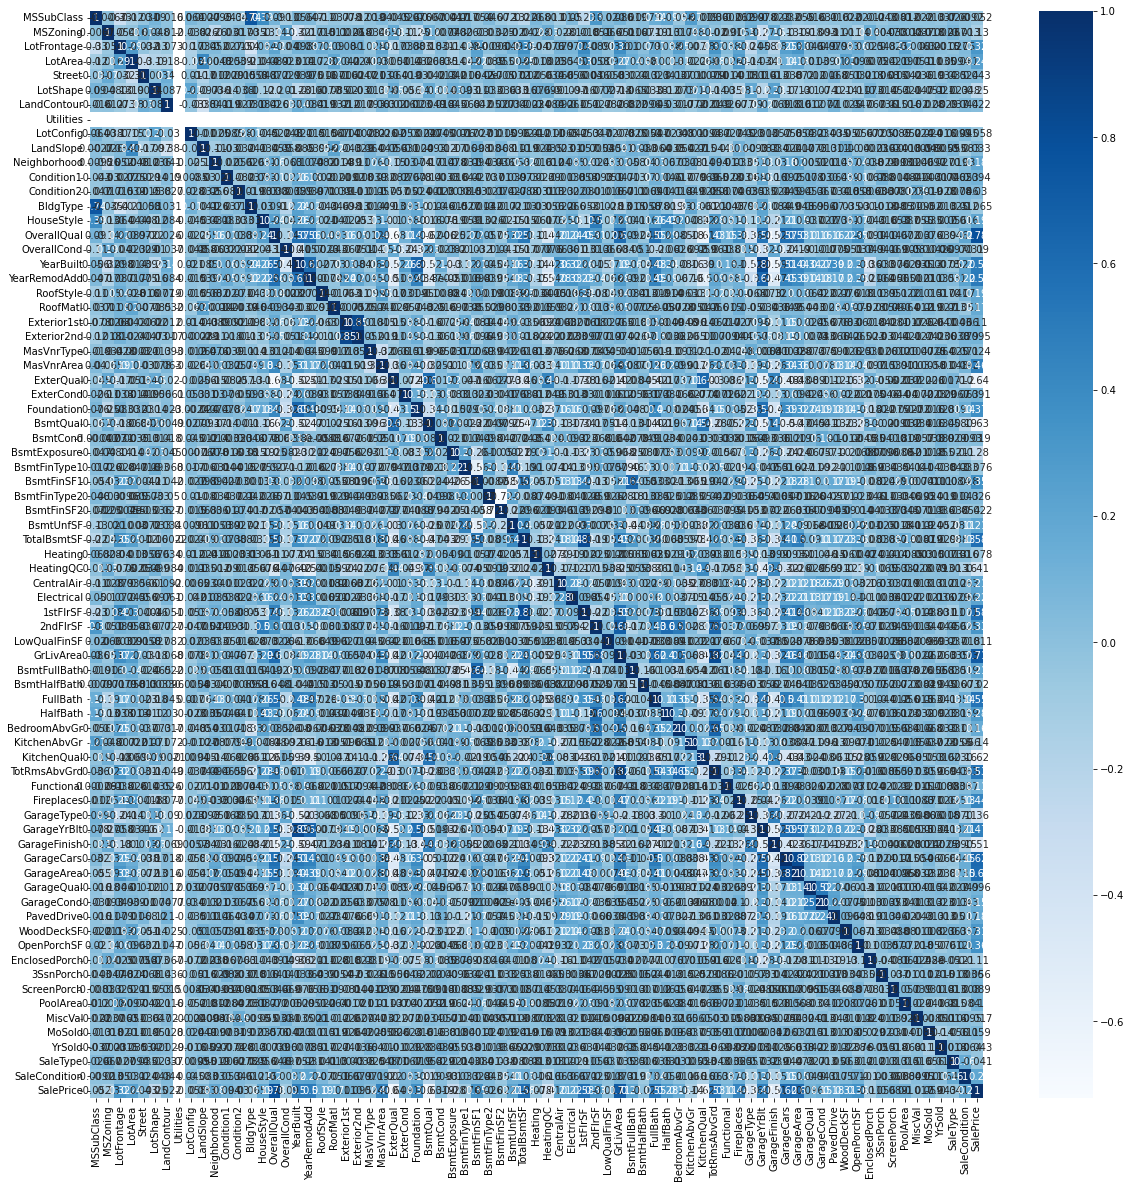

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,cmap='Blues', annot=True)

In [17]:
#univariate Analysis
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='count'>

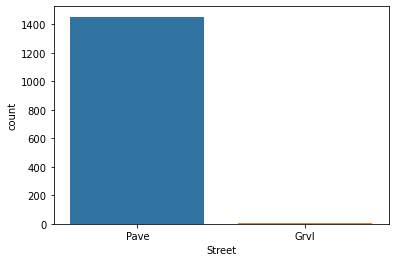

In [44]:
sns.countplot(df['Street'])

In [45]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

<AxesSubplot:xlabel='Alley', ylabel='count'>

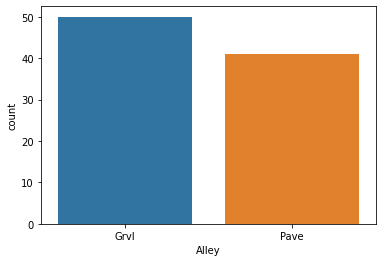

In [46]:
sns.countplot(df['Alley'])  

In [47]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

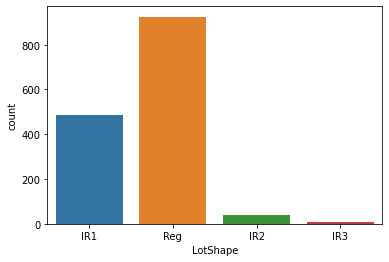

In [48]:
sns.countplot(df['LotShape'])

In [49]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='count'>

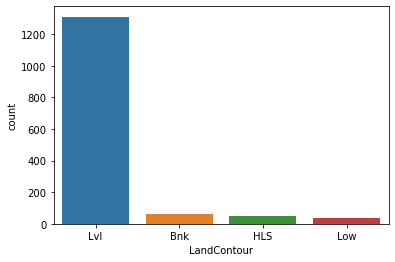

In [50]:
sns.countplot(df['LandContour'])  

In [51]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='Alley', ylabel='count'>

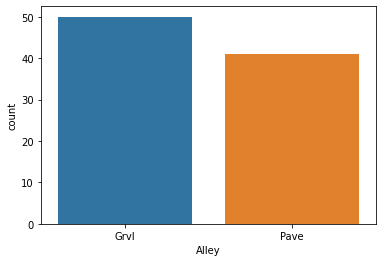

In [52]:
sns.countplot(df['Alley'])  

In [53]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

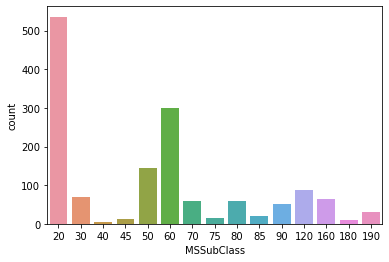

In [54]:
sns.countplot(df['MSSubClass'])  

In [55]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

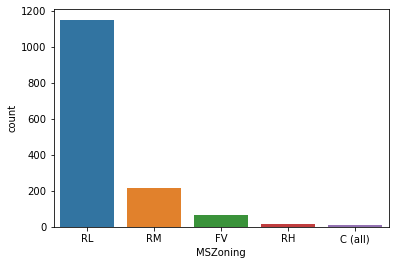

In [56]:
sns.countplot(df['MSZoning'])  

In [57]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='count'>

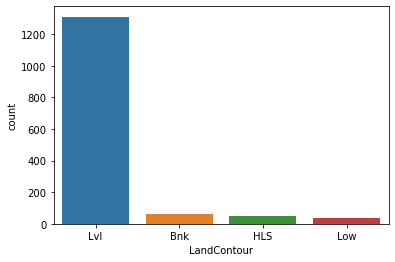

In [58]:
sns.countplot(df['LandContour'])  

In [59]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<AxesSubplot:xlabel='Utilities', ylabel='count'>

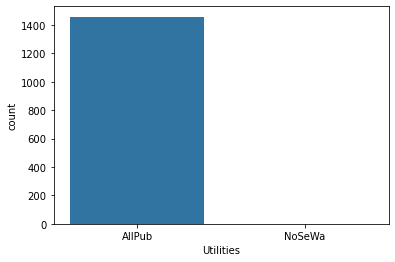

In [60]:
sns.countplot(df['Utilities'])  

In [61]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

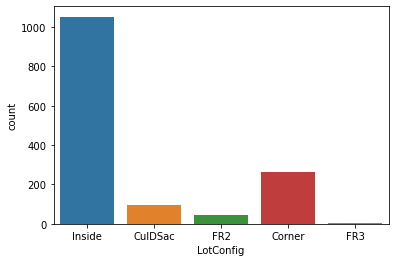

In [62]:
sns.countplot(df['LotConfig'])  

In [63]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

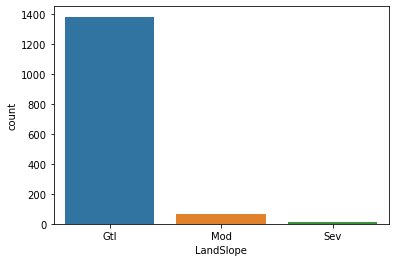

In [64]:
sns.countplot(df['LandSlope'])  

In [65]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

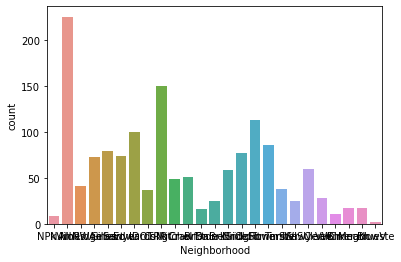

In [66]:
sns.countplot(df['Neighborhood'])  

In [67]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='count'>

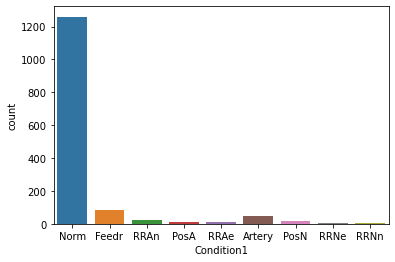

In [68]:
sns.countplot(df['Condition1'])  


In [69]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

<AxesSubplot:xlabel='Condition2', ylabel='count'>

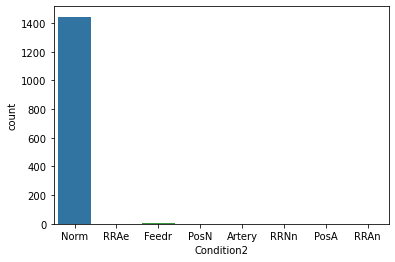

In [70]:
sns.countplot(df['Condition2'])  

In [71]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='count'>

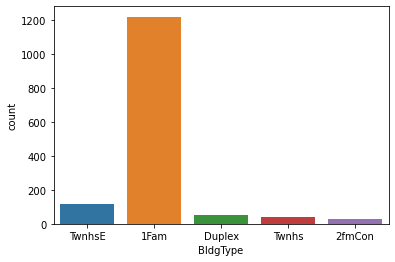

In [72]:
sns.countplot(df['BldgType'])  

In [74]:
df3['SaleCondition'].value_counts()

4    896
5    104
0     68
3     18
2     10
1      1
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

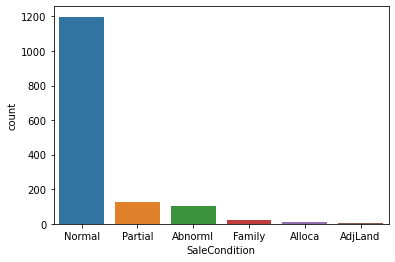

In [75]:
sns.countplot(df['SaleCondition'])  

In [76]:
df3['Heating'].value_counts()

1    1076
2      14
5       4
0       1
4       1
3       1
Name: Heating, dtype: int64

<AxesSubplot:xlabel='Heating', ylabel='count'>

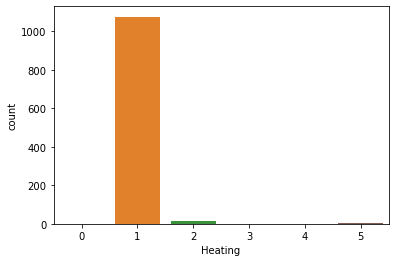

In [77]:
sns.countplot(df3['Heating'])  

In [78]:
df3['GarageType'].value_counts()

1    685
5    314
3     69
2     16
4      8
0      5
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

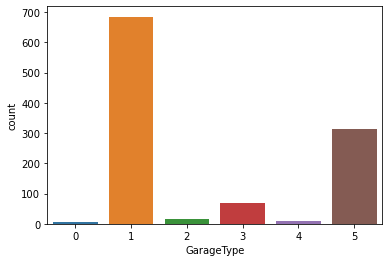

In [79]:
sns.countplot(df3['GarageType'])  

In [80]:
df3['Foundation'].value_counts()

2    494
1    478
0    101
3     18
4      5
5      1
Name: Foundation, dtype: int64

<AxesSubplot:xlabel='Foundation', ylabel='count'>

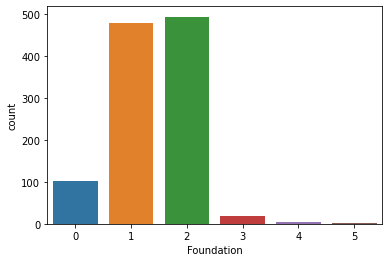

In [81]:
sns.countplot(df3['Foundation'])  

In [82]:
df3['SaleCondition'].value_counts()

4    896
5    104
0     68
3     18
2     10
1      1
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

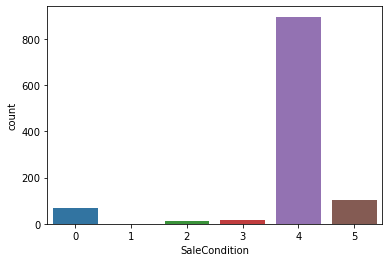

In [83]:
sns.countplot(df3['SaleCondition'])  

In [84]:
df3['KitchenQual'].value_counts()

3    530
2    469
0     80
1     18
Name: KitchenQual, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

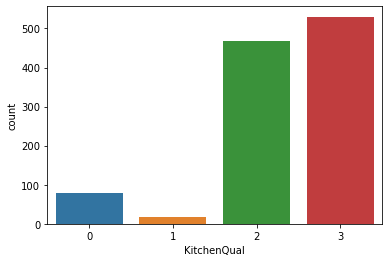

In [85]:
sns.countplot(df3['KitchenQual'])  

In [86]:
df3['CentralAir'].value_counts()

1    1040
0      57
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

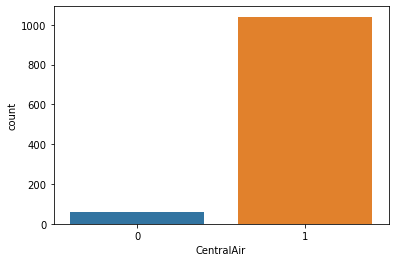

In [87]:
sns.countplot(df3['CentralAir'])  

In [88]:
df3['PavedDrive'].value_counts()

2    1027
0      49
1      21
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

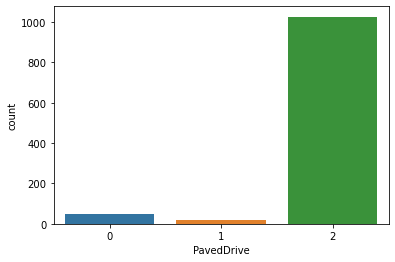

In [89]:
sns.countplot(df3['PavedDrive'])  

In [90]:
df3['GarageFinish'].value_counts()

2    487
1    336
0    274
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

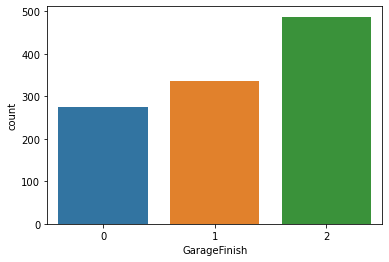

In [91]:
sns.countplot(df3['GarageFinish'])  

In [92]:
df3['SaleType'].value_counts()

8    937
6    102
0     38
3      7
4      4
5      3
1      3
2      2
7      1
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='count'>

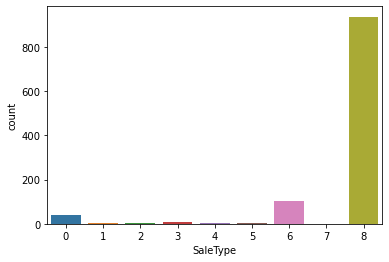

In [93]:
sns.countplot(df3['SaleType'])  

In [94]:
df3['GarageCars'].value_counts()

2    659
1    288
3    146
4      4
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

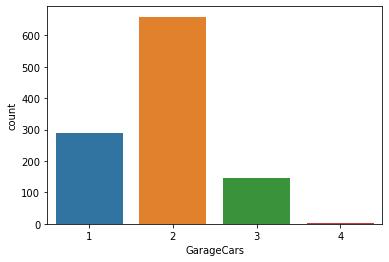

In [95]:
sns.countplot(df3['GarageCars'])  

In [96]:
df3['Fireplaces'].value_counts()

1    510
0    491
2     91
3      5
Name: Fireplaces, dtype: int64

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

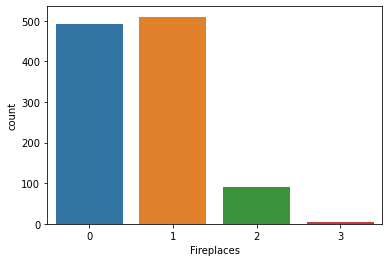

In [97]:
sns.countplot(df3['Fireplaces'])  

In [98]:
df3['BedroomAbvGr'].value_counts()

3    614
2    262
4    168
1     31
5     15
0      4
6      3
Name: BedroomAbvGr, dtype: int64

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

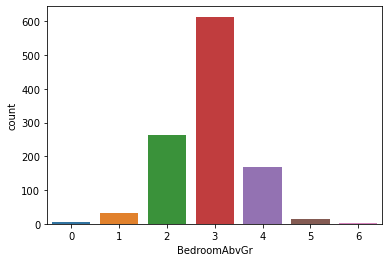

In [99]:
sns.countplot(df3['BedroomAbvGr'])  

<AxesSubplot:>

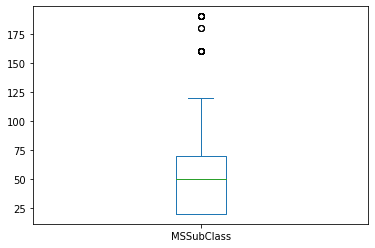

In [100]:
df3['MSSubClass'].plot.box()

<AxesSubplot:>

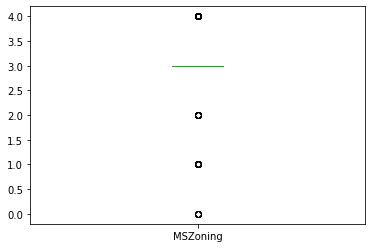

In [101]:
df3['MSZoning'].plot.box()

<AxesSubplot:>

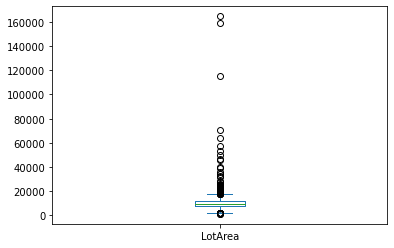

In [102]:
df3['LotArea'].plot.box()

<AxesSubplot:>

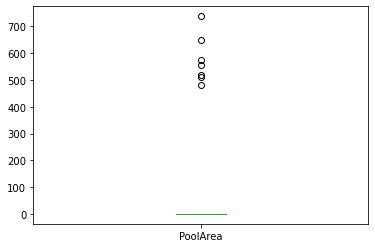

In [103]:
df3['PoolArea'].plot.box()

<AxesSubplot:>

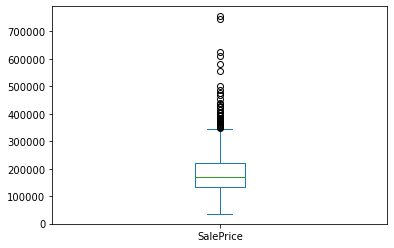

In [104]:
df3['SalePrice'].plot.box()

<AxesSubplot:>

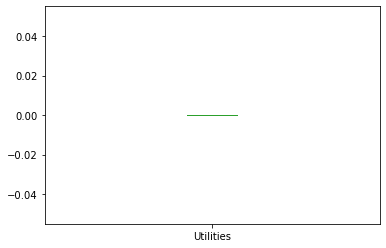

In [105]:
df3['Utilities'].plot.box()

<AxesSubplot:>

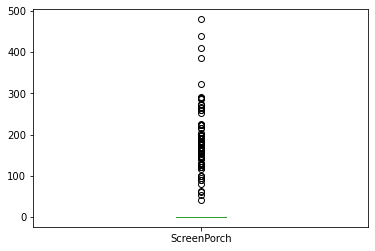

In [106]:
df3['ScreenPorch'].plot.box()

<AxesSubplot:>

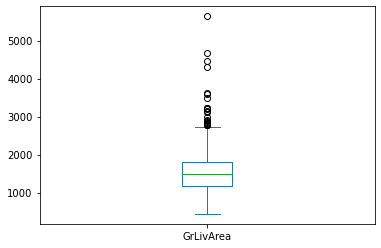

In [107]:
df3['GrLivArea'].plot.box()

<AxesSubplot:>

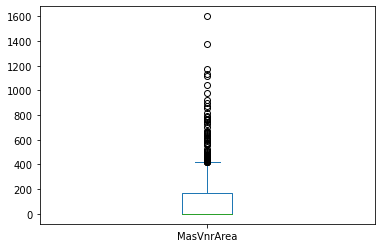

In [108]:
df3['MasVnrArea'].plot.box()

In [109]:
collist=df3.columns.values
ncol=12
nrows=10

MSSubClass          AxesSubplot(0.125,0.125;0.00863029x0.755)
MSZoning         AxesSubplot(0.135356,0.125;0.00863029x0.755)
LotFrontage      AxesSubplot(0.145713,0.125;0.00863029x0.755)
LotArea          AxesSubplot(0.156069,0.125;0.00863029x0.755)
Street           AxesSubplot(0.166425,0.125;0.00863029x0.755)
                                     ...                     
MoSold           AxesSubplot(0.849944,0.125;0.00863029x0.755)
YrSold           AxesSubplot(0.860301,0.125;0.00863029x0.755)
SaleType         AxesSubplot(0.870657,0.125;0.00863029x0.755)
SaleCondition    AxesSubplot(0.881013,0.125;0.00863029x0.755)
SalePrice         AxesSubplot(0.89137,0.125;0.00863029x0.755)
Length: 75, dtype: object

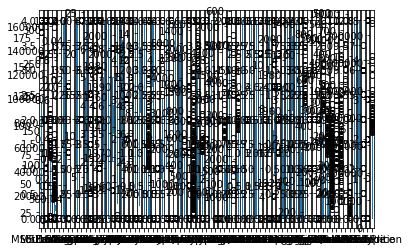

In [110]:
df3.plot(kind='box',subplots=True)

# To check distribution of skewness

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

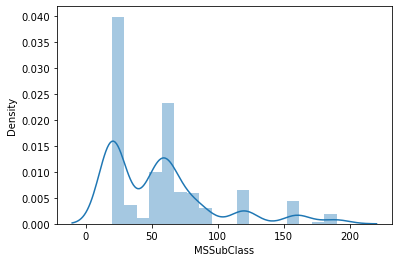

In [135]:
sns.distplot(df3['MSSubClass'])

<AxesSubplot:xlabel='MSZoning', ylabel='Density'>

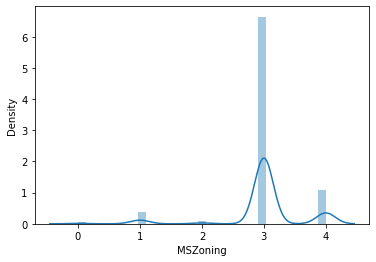

In [112]:
sns.distplot(df3['MSZoning'])

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

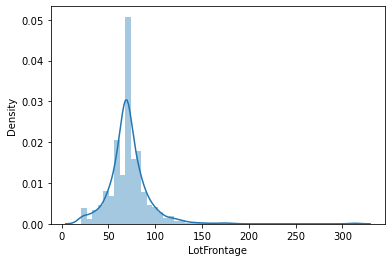

In [113]:
sns.distplot(df3['LotFrontage'])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

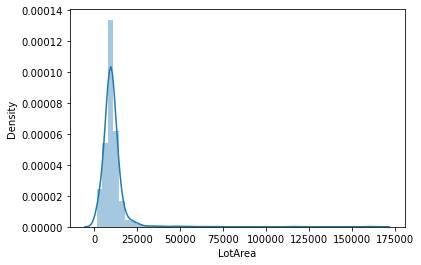

In [114]:
sns.distplot(df3['LotArea'])

<AxesSubplot:xlabel='Street', ylabel='Density'>

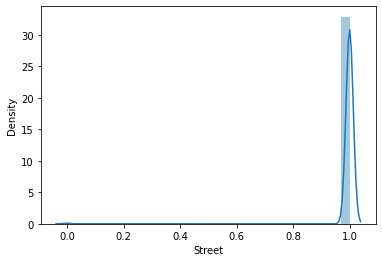

In [115]:
sns.distplot(df3['Street'])

<AxesSubplot:xlabel='LandContour', ylabel='Density'>

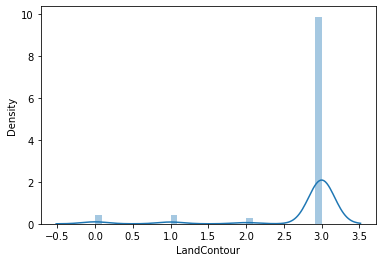

In [116]:
sns.distplot(df3['LandContour'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

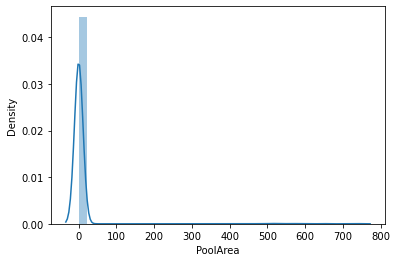

In [117]:
sns.distplot(df3['PoolArea'])

<AxesSubplot:xlabel='Utilities', ylabel='Density'>

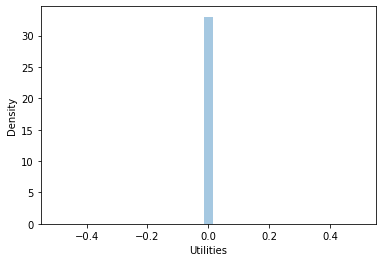

In [118]:
sns.distplot(df3['Utilities'])

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

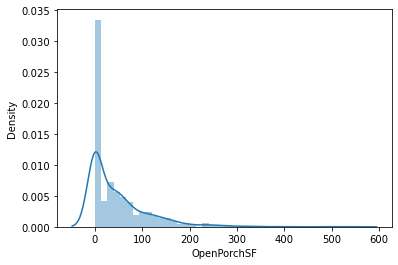

In [119]:
sns.distplot(df3['OpenPorchSF'])

# Bivariate Analysis

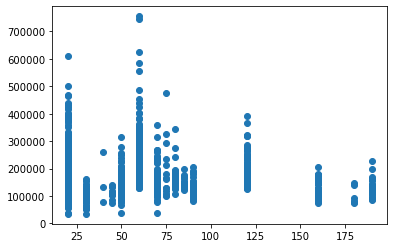

In [120]:
plt.scatter(df['MSSubClass'],df['SalePrice'])

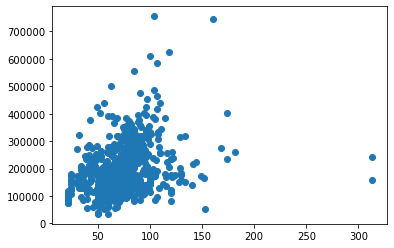

In [121]:
plt.scatter(df['LotFrontage'],df['SalePrice'])

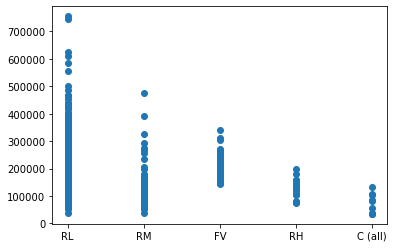

In [122]:
plt.scatter(df['MSZoning'],df['SalePrice'])

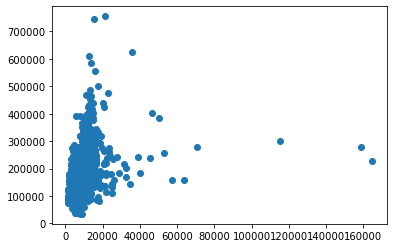

In [123]:
plt.scatter(df['LotArea'],df['SalePrice'])

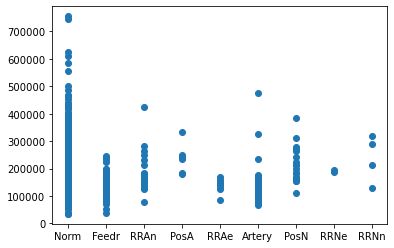

In [124]:
plt.scatter(df['Condition1'],df['SalePrice'])

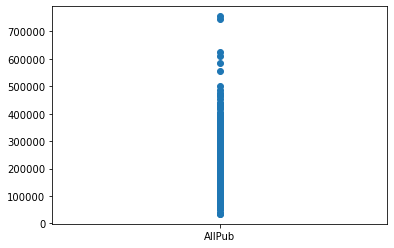

In [125]:
plt.scatter(df['Utilities'],df['SalePrice'])

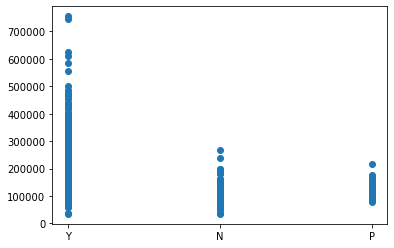

In [126]:
plt.scatter(df['PavedDrive'],df['SalePrice'])

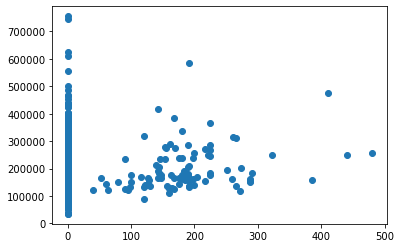

In [127]:
plt.scatter(df['ScreenPorch'],df['SalePrice'])

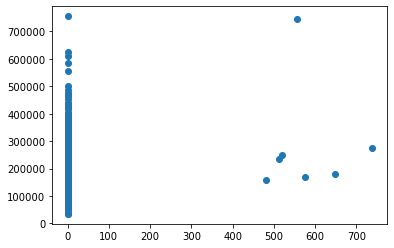

In [128]:
plt.scatter(df['PoolArea'],df['SalePrice'])

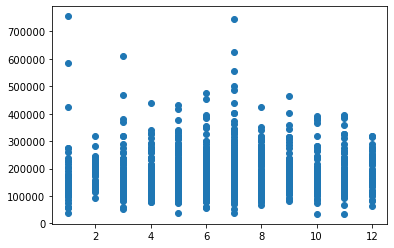

In [129]:
plt.scatter(df['MoSold'],df['SalePrice'])

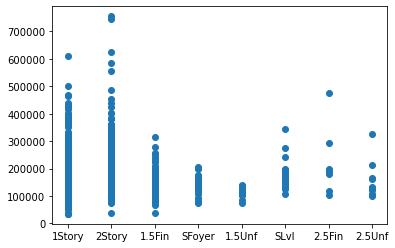

In [130]:
plt.scatter(df['HouseStyle'],df['SalePrice'])

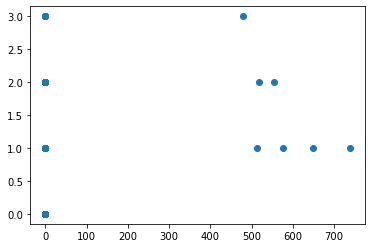

In [131]:
plt.scatter(df['PoolArea'],df['Fireplaces'])

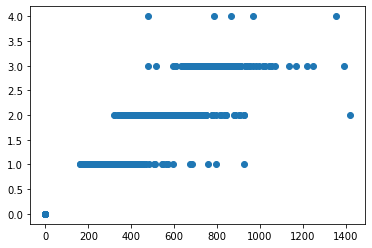

In [132]:
plt.scatter(df['GarageArea'],df['GarageCars'])

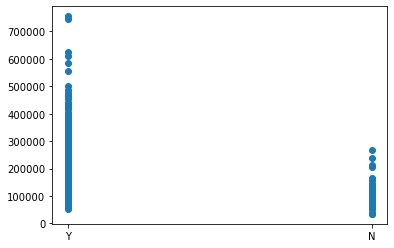

In [133]:
plt.scatter(df['CentralAir'],df['SalePrice'])

In [10]:
# storing all inputs in x excluding y i.e target
x=df3.iloc[:,0:-1]
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,3,69.0,4928,1,0,3,0,4,0,...,205,0,0,0,0,0,2,2007,8,4
1,20,3,95.0,15865,1,0,3,0,4,1,...,207,0,0,224,0,0,10,2007,8,4
2,60,3,92.0,9920,1,0,3,0,1,0,...,130,0,0,0,0,0,6,2007,8,4
3,20,3,105.0,11751,1,0,3,0,4,0,...,122,0,0,0,0,0,1,2010,0,4
4,20,3,69.0,16635,1,0,3,0,2,0,...,0,0,0,0,0,0,6,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,69.0,9819,1,0,3,0,4,0,...,0,0,0,0,0,0,2,2010,8,4
1164,20,3,67.0,8777,1,3,3,0,4,0,...,96,0,0,0,0,0,5,2009,8,4
1165,160,3,24.0,2280,1,3,3,0,2,0,...,0,0,0,0,0,0,7,2009,8,4
1166,70,0,50.0,8500,1,3,3,0,4,0,...,54,172,0,0,0,0,7,2008,8,4


In [11]:
# storing label i.e target in y
y=df3.iloc[:,-1]
y

0       128000.0
1       268000.0
2       269790.0
3       190000.0
4       215000.0
          ...   
1163    122000.0
1164    108000.0
1165    148500.0
1166     40000.0
1167    183200.0
Name: SalePrice, Length: 1097, dtype: float64

In [20]:
x.shape

(1097, 74)

In [21]:
y.shape

(1097,)

In [12]:
# now making train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [24]:
x_train.shape

(877, 74)

In [25]:
y_train.shape

(877,)

In [26]:
x_test.shape

(220, 74)

In [27]:
y_test.shape

(220,)

In [14]:
# using Linear Regression
lm= LinearRegression()

In [15]:
lm.fit(x_train, y_train) 

LinearRegression()

In [22]:
pred=lm.predict(x_test)
pred

array([108142.50382458,  97382.2859136 , 138902.96749827, 238627.06366112,
       199550.41622795, 173092.48326828, 260607.23541856, 141649.97590683,
       150267.28547404,  86355.99045635, 208209.14666891, 202829.44199515,
       253589.88481711, 198471.74268121, 146630.06214177, 299447.45917952,
       151550.34838096, 168571.29558743, 444469.42247799, 311198.61106766,
       254158.92812553, 170661.35848567, 246762.44033601, 267512.84493796,
       133555.73159217, 261575.63133496, 274343.84745692,  63297.93884067,
       119182.94272217,  98596.82967401,  85181.43547449, 169029.39689621,
       117451.7197236 , 182119.88732435, 138869.8317775 , 280839.9817389 ,
       330888.34244927, 138712.12967164,  90132.44008154, 267636.60132565,
       234241.83025255, 127157.29250874, 226646.06850159, 161502.06086435,
       168309.2518545 , 151656.25557895, 203081.91708899, 233257.24504215,
       129187.42404104,  91387.67499007, 105581.18311449, 125650.3188179 ,
       137742.44078296, 1

In [16]:
lm.score(x_train,y_train)

0.8630709715640045

Metrics

In [43]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
      
print('Root Mean Squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 3.247408500589172
Mean Squared error: 23.622167802935035
Root Mean Squared error: 4.860264170077079


Saving the Model

In [18]:
import joblib

In [19]:
# saving the model as a object file
joblib.dump(lm,'lmfile.obj')

['lmfile.obj']